In [1]:
import os
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')
# Provide the path to the folder in your Drive
folder_path = '/content/drive/MyDrive/CCFD_Delivery/Data'
os.chdir(folder_path)
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['pipeline_utils.py', 'creditcard.csv', 'resampled_data.pkl', '__pycache__']

In [2]:
import time
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pipeline_utils import scale_data, split_data
from imblearn.under_sampling import ClusterCentroids, TomekLinks
from imblearn.over_sampling import ADASYN, SVMSMOTE, BorderlineSMOTE

## Loading Data, Scaling and Splitting

In [3]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df = data.copy()
scale_data(df, cols = ['Amount', 'Time'])
df

,scaled_Amount,scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.296653,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,0.038986,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,0.641096,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.167680,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [5]:
X_train, X_test, y_train, y_test = split_data(df, 0.2)

(284807, 30)
(284807, 1)

 Train set
[0 1]
[227451    394]
[99.82707542  0.17292458] %

 Test set
[0 1]
[56864    98]
[99.82795548  0.17204452] %


## Sampling

In [6]:
samplers = {
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "BorderlineSmote": BorderlineSMOTE(sampling_strategy='auto' ,random_state=42),
    "ClusterCentroids": ClusterCentroids(random_state=42),
    "TomekLinks" : TomekLinks()
}

In [7]:
# Dictionary to hold the resampled data
resampled_data = {}
results_df = pd.DataFrame(columns=["Sampler", "Sampling_Time"])

for sampler_name, sampler in samplers.items():
    print('\t' + sampler_name)
    start_time = time.time()
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)  # Resample X_train and y_train
    end_time = time.time()
    print(f"{sampler_name} Done!")

    # Append the results to the DataFrame using pd.concat
    new_row = {"Sampler": sampler_name, "Sampling_Time": end_time - start_time}
    results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

    # Store the resampled data in the dictionary
    resampled_data[f"X_resampled_{sampler_name}"] = X_resampled
    resampled_data[f"y_resampled_{sampler_name}"] = y_resampled

print(results_df)

	ADASYN
ADASYN Done!
  Sampler  Sampling_Time
0  ADASYN       2.021636
	SVMSMOTE
SVMSMOTE Done!
    Sampler  Sampling_Time
0    ADASYN       2.021636
1  SVMSMOTE     207.416983
	BorderlineSmote
BorderlineSmote Done!
           Sampler  Sampling_Time
0           ADASYN       2.021636
1         SVMSMOTE     207.416983
2  BorderlineSmote       1.630823
	ClusterCentroids


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ClusterCentroids Done!
            Sampler  Sampling_Time
0            ADASYN       2.021636
1          SVMSMOTE     207.416983
2   BorderlineSmote       1.630823
3  ClusterCentroids     677.550734
	TomekLinks
TomekLinks Done!
            Sampler  Sampling_Time
0            ADASYN       2.021636
1          SVMSMOTE     207.416983
2   BorderlineSmote       1.630823
3  ClusterCentroids     677.550734
4        TomekLinks     347.313825


In [8]:
# Add X_train and y_train to the resampled_data dictionary for later use
resampled_data["X_train"] = X_train
resampled_data["y_train"] = y_train

# Add X_test and y_test to the resampled_data dictionary for later use
resampled_data["X_test"] = X_test
resampled_data["y_test"] = y_test

#Saving dictionary in pickle file
with open("resampled_data_new.pkl", "wb") as f:
    pickle.dump(resampled_data, f)

In [9]:
#Loading the pickle file
with open("resampled_data_new.pkl", "rb") as f:
  resampled_data = pickle.load(f)

resampled_data.keys()

dict_keys(['X_resampled_ADASYN', 'y_resampled_ADASYN', 'X_resampled_SVMSMOTE', 'y_resampled_SVMSMOTE', 'X_resampled_BorderlineSmote', 'y_resampled_BorderlineSmote', 'X_resampled_ClusterCentroids', 'y_resampled_ClusterCentroids', 'X_resampled_TomekLinks', 'y_resampled_TomekLinks', 'X_train', 'y_train', 'X_test', 'y_test'])

In [10]:
X_train = resampled_data['X_train']
y_train = resampled_data['y_train']

## Plotting Data Distribution Before and After

In [11]:
# This Function Plots a dot plot of the classes distribution with all the features
def plot_dot_plot(X_train, y_train):
    num_features = X_train.shape[1]
    num_classes = len(np.unique(y_train))

    fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(6, 4*num_features))

    for i in range(num_features):
        ax = axes[i]
        feature_values = X_train[:, i]
        ax.scatter(feature_values, y_train, alpha=0.5)
        ax.set_xlabel(f'Feature {i+1}')
        ax.set_ylabel('Class Label')
        ax.set_title(f'Dot Plot for Feature {i+1}')

    plt.tight_layout()
    plt.show()

In [13]:
# This function plots class distribution for all samplers, it takes one argument (The dictionary that contains all the resampled data)
def data_distribution_all_samplers(resampled_data):
    plt.figure(figsize=(10, 6))
    width = 0.35  # Width of the bars

    samplers = []
    class_0_counts = []
    class_1_counts = []

    for key in resampled_data.keys():
        if key.startswith("X_resampled_"):  # Check if it is an X_resampled_ key
            X_resampled_key = key
            sampler = key.replace("X_resampled_", "")  # Get the original clf_name
            y_resampled_key = f"y_resampled_{sampler}"  # Get the corresponding y_resampled_ key

            # Calculate class counts
            class_0_indices = np.where(resampled_data[y_resampled_key] == 0)[0]
            class_1_indices = np.where(resampled_data[y_resampled_key] == 1)[0]

            class_0_counts.append(len(class_0_indices))
            class_1_counts.append(len(class_1_indices))
            samplers.append(sampler)

    x = np.arange(len(samplers))  # the label locations

    plt.bar(x - width/2, class_0_counts, width, label='Class 0')
    plt.bar(x + width/2, class_1_counts, width, label='Class 1')

    plt.xlabel('Sampler')
    plt.ylabel('Count')
    plt.title('Class Distribution for Different Samplers')
    plt.xticks(x, samplers)
    plt.legend()

    for i, (count_0, count_1) in enumerate(zip(class_0_counts, class_1_counts)):
        plt.text(i - width/2, count_0, str(count_0), va='bottom', ha='center')
        plt.text(i + width/2, count_1, str(count_1), va='bottom', ha='center')

    plt.tight_layout()
    plt.show()

In [12]:
# This Function Plots Class Distribution for 1 Set/Sampler (If Needed Because the previous one takes a lot of time to plot all samplers distribution)
def plot_class_distribution(y_train):
    unique_classes, class_counts = np.unique(y_train, return_counts=True)

    plt.figure(figsize=(8, 6))
    bars = plt.bar(unique_classes, class_counts, color='skyblue')
    plt.xlabel('Class Label')
    plt.ylabel('Count')
    plt.title('Class Distribution Histogram')
    plt.xticks(unique_classes)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

    plt.show()

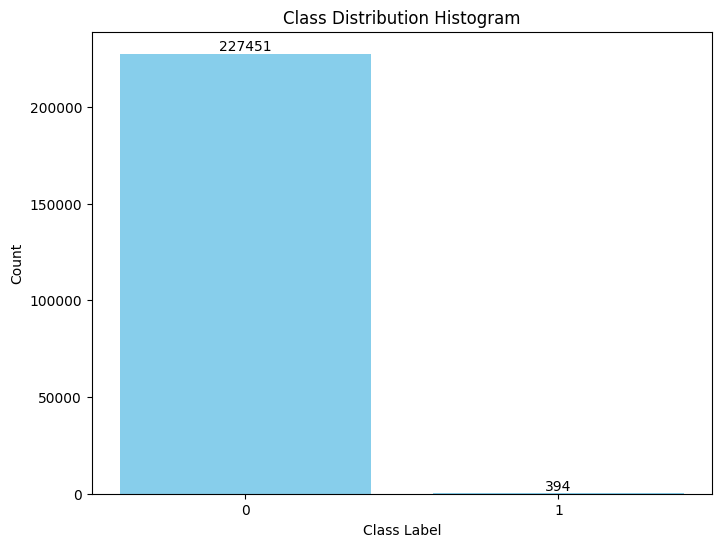

In [15]:
plot_class_distribution(y_train)

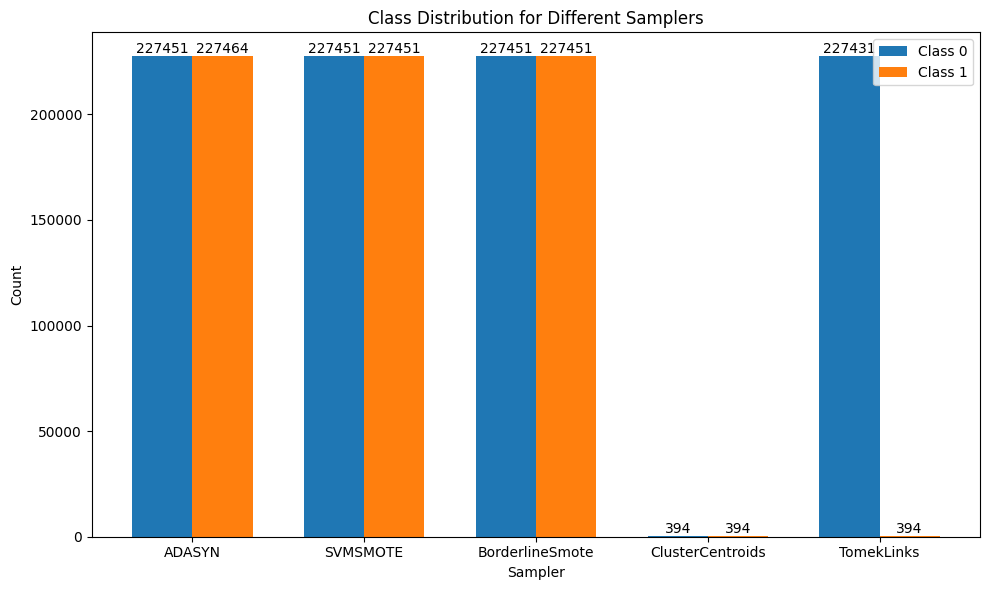

In [14]:
data_distribution_all_samplers(resampled_data)